<a href="https://colab.research.google.com/github/Meghana1303/AdventureWorks/blob/master/Bike_Buying_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AdvWorksCusts(new).csv to AdvWorksCusts(new).csv
User uploaded file "AdvWorksCusts(new).csv" with length 2545537 bytes


In [0]:
import pandas as pd
import numpy as np
import io
from pandas import Series,DataFrame


In [3]:
adv_df=pd.read_csv(io.StringIO(uploaded['AdvWorksCusts.csv'].decode('ISO-8859-1')))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [69]:
adv_df.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,Unnamed: 24,Unnamed: 25
0,11000.0,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08-04-1966,Bachelors,Professional,M,M,1.0,0.0,0.0,2.0,137947.0,89.0,NaN,NaN
1,11001.0,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14-05-1965,Bachelors,Professional,M,S,0.0,1.0,3.0,3.0,101141.0,117.0,NaN,NaN
2,11002.0,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,12-08-1965,Bachelors,Professional,M,M,1.0,1.0,3.0,3.0,91945.0,123.0,NaN,NaN
3,11003.0,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,15-02-1968,Bachelors,Professional,F,S,0.0,1.0,0.0,0.0,86688.0,50.0,NaN,NaN
4,11004.0,,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,08-08-1968,Bachelors,Professional,F,S,1.0,4.0,5.0,5.0,92771.0,95.0,NaN,NaN


In [0]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AW_AveMonthSpend(new).csv to AW_AveMonthSpend(new).csv
User uploaded file "AW_AveMonthSpend(new).csv" with length 167346 bytes


In [72]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AW_BikeBuyer(new).csv to AW_BikeBuyer(new).csv
User uploaded file "AW_BikeBuyer(new).csv" with length 148693 bytes


In [0]:
# perform necessary import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [0]:
# load datasets
customer_info = pd.read_csv('AdvWorksCusts(new).csv')
customer_spending = pd.read_csv('AW_AveMonthSpend(new).csv')
customer_has_bike= pd.read_csv('AW_BikeBuyer(new).csv')

In [75]:
# remove duplicates
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)

(16519, 23)
(16404,)


In [76]:
customer_info.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_info.shape)
print(customer_info.CustomerID.unique().shape)

(16404, 23)
(16404,)


In [77]:
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [78]:
customer_spending.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_spending.shape)
print(customer_spending.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [79]:
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

(16519, 2)
(16404,)


In [80]:
customer_has_bike.drop_duplicates(subset = 'CustomerID', keep = 'last', inplace = True)
print(customer_has_bike.shape)
print(customer_has_bike.CustomerID.unique().shape)

(16404, 2)
(16404,)


In [81]:
# check for missing values
(customer_has_bike.astype(np.object).isnull()).any()

CustomerID    False
BikeBuyer     False
dtype: bool

In [82]:
(customer_spending.astype(np.object).isnull()).any()

CustomerID       False
AveMonthSpend    False
dtype: bool

In [83]:
(customer_info.astype(np.object).isnull()).any()

CustomerID              False
Title                    True
FirstName               False
MiddleName               True
LastName                False
Suffix                   True
AddressLine1            False
AddressLine2             True
City                    False
StateProvinceName       False
CountryRegionName       False
PostalCode              False
PhoneNumber             False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
dtype: bool

In [84]:
customer_info.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000,16404.000000
mean,20240.143136,0.674104,1.499756,0.991100,2.004511,78129.672397
std,5340.370705,0.468723,1.139135,1.514278,1.682318,39728.383493
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000
25%,15617.750000,0.000000,1.000000,0.000000,0.000000,47808.750000
50%,20231.500000,1.000000,2.000000,0.000000,2.000000,76125.000000
75%,24862.250000,1.000000,2.000000,2.000000,3.000000,105211.750000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000


In [85]:
customer_spending.describe()

,CustomerID,AveMonthSpend
count,16404.000000,16404.000000
mean,20240.143136,72.391002
std,5340.370705,27.269921
min,11000.000000,22.000000
25%,15617.750000,52.000000
50%,20231.500000,68.000000
75%,24862.250000,84.000000
max,29482.000000,176.000000


In [86]:
customer_has_bike.describe()

,CustomerID,BikeBuyer
count,16404.000000,16404.000000
mean,20240.143136,0.332541
std,5340.370705,0.471138
min,11000.000000,0.000000
25%,15617.750000,0.000000
50%,20231.500000,0.000000
75%,24862.250000,1.000000
max,29482.000000,1.000000


In [87]:
customer_has_bike.BikeBuyer.value_counts(normalize=True)

0    0.667459
1    0.332541
Name: BikeBuyer, dtype: float64

In [88]:
combined = customer_info.merge(customer_has_bike, on='CustomerID', how='left')
combined.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,08-04-1966,Bachelors,Professional,M,M,1,0,0,2,137947,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,14-05-1965,Bachelors,Professional,M,S,0,1,3,3,101141,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,12-08-1965,Bachelors,Professional,M,M,1,1,3,3,91945,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,15-02-1968,Bachelors,Professional,F,S,0,1,0,0,86688,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,08-08-1968,Bachelors,Professional,F,S,1,4,5,5,92771,1


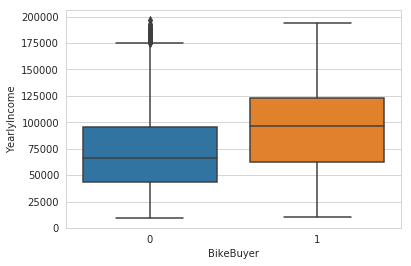

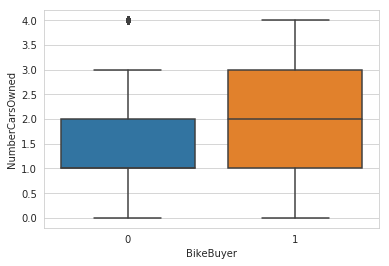

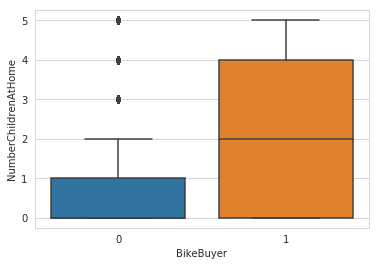

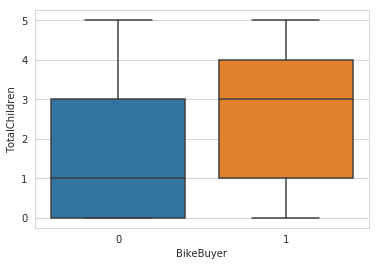

In [89]:
# define function for plotting box plot
def plot_box(combined, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=combined)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

cols = ['YearlyIncome','NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren']       
plot_box(combined, cols)

In [90]:
is_bike_buyer= combined.BikeBuyer==1
bike_buyers = combined[is_bike_buyer]
print(bike_buyers.shape)
is_non_bike_buyer= combined.BikeBuyer==0
non_bike_buyers = combined[is_non_bike_buyer]
print(non_bike_buyers.shape)

(5455, 24)
(10949, 24)


In [0]:
# bar plot function for non numeric features
# plot bar plot for bike buyer counts

def plt_bar_plot(cat_cols):
    combined['dummy'] = np.ones(shape = combined.shape[0])
    for col in cat_cols:
        print(col)
        counts = combined[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n non bike buyer')
        plt.ylabel('count')
        temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
        temp.plot.bar(x=col,y ='dummy')

        plt.title('Counts for ' + col + '\n bike buyer')
        plt.ylabel('count')
        plt.show()

Occupation


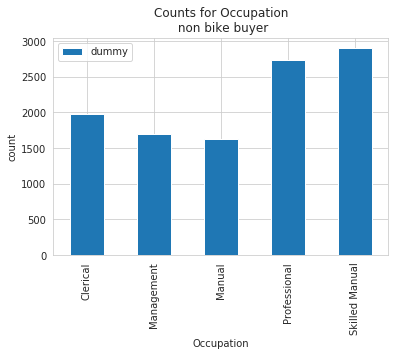

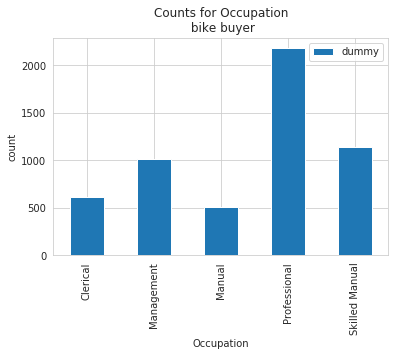

Gender


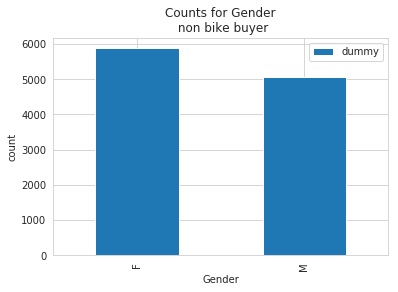

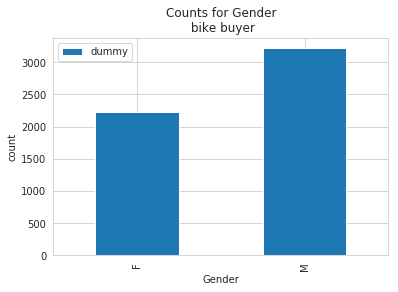

MaritalStatus


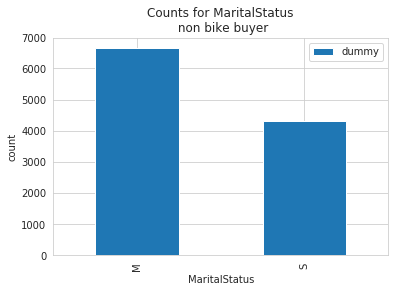

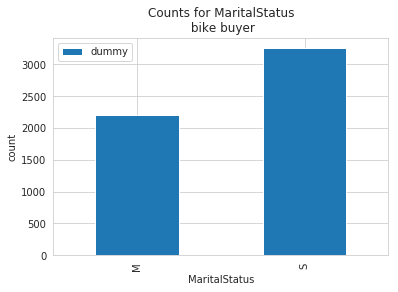

In [92]:
cols = ['Occupation', 'Gender','MaritalStatus']
plt_bar_plot(cols)

In [93]:
# try feature generation - hasChildren
has_child_at_home = []
def generate_has_child_at_home(customer_info, has_child_at_home):
    for index, row in customer_info.iterrows():
        if row.NumberChildrenAtHome>0:
            has_child_at_home.append('Y')
        else:
            has_child_at_home.append('N')
    return has_child_at_home
        
combined['hasChildAtHome'] = generate_has_child_at_home(customer_info, has_child_at_home)
combined[['hasChildAtHome','NumberChildrenAtHome']].head()

,hasChildAtHome,NumberChildrenAtHome
0,N,0
1,Y,3
2,Y,3
3,N,0
4,Y,5


hasChildAtHome


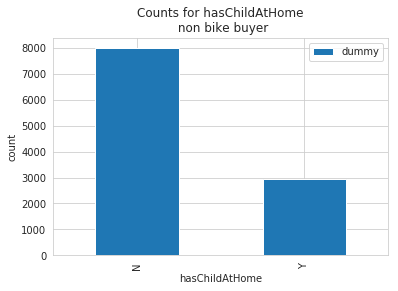

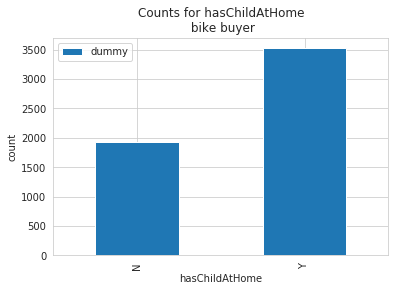

In [94]:
cols = ['hasChildAtHome']
plt_bar_plot(cols)

In [95]:
features_chosen = ['YearlyIncome','NumberCarsOwned', 'Occupation', 'Gender','MaritalStatus','hasChildAtHome']
features = combined[features_chosen]
features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,137947,0,Professional,M,M,N
1,101141,1,Professional,M,S,Y
2,91945,1,Professional,M,M,Y
3,86688,1,Professional,F,S,N
4,92771,4,Professional,F,S,Y


In [96]:
labels = np.array(combined.BikeBuyer)
print(labels)

[0 1 0 ... 0 0 0]


In [0]:
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

def encode_string(cat_features):
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

In [0]:
def encode_cat_features(features):
    cat_features = [ 'Gender','MaritalStatus','hasChildAtHome']
    f = encode_string(features['Occupation'])
    for cat in cat_features:
        enc = encode_string(features[cat])
        f = np.concatenate([f,enc],1)
    return f

In [0]:
numeric_features = np.array(combined[['YearlyIncome','NumberCarsOwned']])

In [100]:
encoded_features = encode_cat_features(features)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [0]:
features = np.concatenate([encoded_features,numeric_features], 1)

In [102]:
features.shape
features[3,:13]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 8.6688e+04, 1.0000e+00])

In [103]:
# Time to split and train
nr.seed(9988)
indx = range(features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = features[indx[1],:]
y_test = np.ravel(labels[indx[1]])
X_train[:2]

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 3.97160e+04, 1.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.72468e+05, 2.00000e+00]])

In [104]:
# Time to scale, this would most especially be useful in yearly income
scaler = preprocessing.StandardScaler().fit(X_train[:,11:])
X_train[:,11:] = scaler.transform(X_train[:,11:])
X_test[:,11:] = scaler.transform(X_test[:,11:])
X_train[:2]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -0.96803832, -0.43876786],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  2.37320265,  0.43844103]])

In [0]:
# Due to class imbalance for bike buyers and non bike buyers we wil be making use of class weight parameters
logistic_mod = linear_model.LogisticRegression(class_weight="balanced")

In [106]:
# perform cross validation for the regularization parameter C
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(3456)
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
clf.fit(features, labels)
clf.best_estimator_.C

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.1

In [107]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, features, labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Mean performance metric = 0.670
SDT of the metric       = 0.010
Outcomes by cv fold
Fold  1    0.672
Fold  2    0.652
Fold  3    0.688
Fold  4    0.664
Fold  5    0.682
Fold  6    0.665
Fold  7    0.663
Fold  8    0.663
Fold  9    0.677
Fold 10    0.678


In [108]:
# logistic regression with weight more on the bike buyer =1 case due to class imbalance {0:1,1:2}
logistic_mod = linear_model.LogisticRegression(C=clf.best_estimator_.C, class_weight="balanced") 
logistic_mod.fit( X_train, y_train)
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.00230034]
[[ 0.21402281 -0.8806718   0.46320162  0.00115858  0.20458913 -0.21770668
   0.22000702 -0.73166213  0.73396247 -0.86942543  0.87172577  0.9021973
  -0.00124658]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [109]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.62415101 0.37584899]
 [0.38487313 0.61512687]
 [0.48483137 0.51516863]
 [0.33162968 0.66837032]
 [0.6888334  0.3111666 ]
 [0.90497289 0.09502711]
 [0.81824471 0.18175529]
 [0.84378025 0.15621975]
 [0.82469365 0.17530635]
 [0.47412803 0.52587197]
 [0.96465145 0.03534855]
 [0.29984697 0.70015303]
 [0.41667284 0.58332716]
 [0.52057317 0.47942683]
 [0.57184659 0.42815341]]


In [110]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
threshold = 0.51
scores = score_model(probabilities, threshold)
print(np.array(scores[:18]))
print(y_test[:18])

[0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0]
[1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [0]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

In [112]:
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       155                58
Actual negative        25                62

Accuracy  0.72
 
           Positive      Negative
Num case      213            87
Precision    0.86          0.52
Recall       0.73          0.71
F1           0.79          0.60


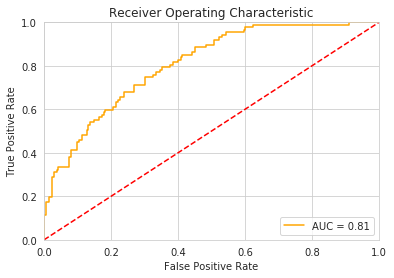

In [113]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)

In [114]:
features.shape

(16404, 13)

In [115]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {"max_features": [2, 3, 5, 10, 13], "min_samples_leaf":[3, 5, 10, 20]}
nr.seed(3456)
rf_clf = RandomForestClassifier(class_weight = "balanced")
nr.seed(4455)
rf_clf = ms.GridSearchCV(estimator = rf_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)
rf_clf.fit(features, labels)
print(rf_clf.best_estimator_.max_features)
print(rf_clf.best_estimator_.min_samples_leaf)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

3
20


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [117]:
nr.seed(1115)
rf_mod = RandomForestClassifier(class_weight = "balanced", 
                                max_features = rf_clf.best_estimator_.max_features, 
                                min_samples_leaf = rf_clf.best_estimator_.min_samples_leaf) 
rf_mod.fit(X_train, y_train)
probabilities = rf_mod.predict_proba(X_test)
scores = score_model(probabilities, 0.54)
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive       166                47
Actual negative        27                60

Accuracy  0.75
 
           Positive      Negative
Num case      213            87
Precision    0.86          0.56
Recall       0.78          0.69
F1           0.82          0.62


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


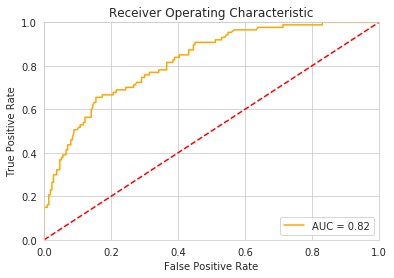

In [118]:
plot_auc(y_test, probabilities)

In [120]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AW_test.csv to AW_test.csv
User uploaded file "AW_test.csv" with length 77223 bytes


In [121]:
# import final test data
final = pd.read_csv('AW_test.csv')
print(final.shape)
print(final.CustomerID.unique().shape)

(500, 23)
(500,)


In [122]:
final.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,United States,94536,133-555-0128,01-05-1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,Canada,V2W 1W2,252-555-0173,10-04-1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,United States,91502,409-555-0193,01-12-1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,United States,94010,175-555-0196,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,France,59140,1 (11) 500 555-0122,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [0]:
final['hasChildAtHome'] = generate_has_child_at_home(final,[])

In [124]:
final_features = final[features_chosen]
final_features.head()

,YearlyIncome,NumberCarsOwned,Occupation,Gender,MaritalStatus,hasChildAtHome
0,86931,2,Management,F,S,N
1,100125,2,Skilled Manual,M,M,Y
2,103985,2,Management,F,M,N
3,127161,0,Skilled Manual,M,M,N
4,21876,1,Manual,F,M,Y


In [125]:
numeric_final_features = np.array(final_features[['YearlyIncome','NumberCarsOwned']])
encoded_final_features = encode_cat_features(final_features)
final_features = np.concatenate([encoded_final_features,numeric_final_features], 1)
final_features[3,:13]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:414: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.27161e+05, 0.00000e+00])

In [126]:
final_features[:,11:] = scaler.transform(final_features[:,11:])
final_features[:2]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.2203181 , 0.43844103],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.55239847, 0.43844103]])

In [0]:
probabilities = rf_mod.predict_proba(final_features)
scores = score_model(probabilities, 0.54)

In [128]:
print(scores)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1
 1 1 1 0 0 1 0 0 1 1 1 1 

In [0]:
np.savetxt('final_answers.csv', scores, delimiter=',',fmt='%i')

In [0]:
from google.colab import files

#with open('final_answers.csv', 'w') as f:
#  f.write()

files.download('final_answers.csv')